This task is to perform a Factor Analysis on our dataset. You should be able to reduce dimensionality and name factors. Make sure you provide your explanation after each graph and analysis as a text (do not use #comments)


Step 1 - Data Description

Step 2 - Correlation Matrix

Step 3 - KMO

Step 4 - Number of Factors

Step 5 - Run Analysis

Step 6 - Regression

Please provide description provided output and/or graphs



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as se
import time
import timeit
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [44]:
train=pd.read_csv('/content/gdrive/My Drive/Babra/train_values.csv' )
labels=pd.read_csv('/content/gdrive/My Drive/Babra/train_labels.csv')
blankIndex=[''] * len(train)
train.index=train.row_id
ai=['row_id']
train=train.drop(ai, axis=1)
#test=pd.read_csv('/content/gdrive/My Drive/Babra/test_values.csv')
labels.index=labels.row_id
labels=labels.drop(ai, axis=1)
train.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
row_id,,,,,,,,,,,,,,,,,,,,,
0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False
1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False
2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False
3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True
4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   loan_type                       500000 non-null  int64  
 1   property_type                   500000 non-null  int64  
 2   loan_purpose                    500000 non-null  int64  
 3   occupancy                       500000 non-null  int64  
 4   loan_amount                     500000 non-null  float64
 5   preapproval                     500000 non-null  int64  
 6   msa_md                          500000 non-null  int64  
 7   state_code                      500000 non-null  int64  
 8   county_code                     500000 non-null  int64  
 9   applicant_ethnicity             500000 non-null  int64  
 10  applicant_race                  500000 non-null  int64  
 11  applicant_sex                   500000 non-null  int64  
 12  applicant_income

The train dataset consists of 500,000 mortgage applications having 21 features which are representative of application process. The  label dataset contains decision of corresponding application that is accepted of denied application. The features are listed with the info method in pandas. Here we can see some features are not up to 500,000 indicating the presence of missing values. Some statistical examination can be done on the data to enusre proper understanding of the features distribution.

#Correlation matrix

In [46]:
train.corr()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
loan_type,1.000000,-0.065214,-0.121296,-0.158964,-0.018513,-0.133156,-0.024445,-0.047184,-0.016363,-0.050118,-0.016649,-0.072372,-0.102352,0.043687,0.016511,-0.070460,-0.008350,0.036510,0.054288,-0.027408,-0.025502
property_type,-0.065214,1.000000,-0.114663,0.156139,0.135923,0.046035,-0.076069,-0.017647,-0.007445,0.131192,0.063428,0.106785,-0.068350,-0.027060,-0.014949,-0.092672,-0.066520,-0.029079,0.005871,-0.035769,-0.029625
loan_purpose,-0.121296,-0.114663,1.000000,0.002154,-0.002847,0.487352,0.072506,0.118267,0.058151,0.023305,0.021642,0.014322,0.019807,-0.013257,0.042845,0.057065,0.004105,-0.016632,-0.024312,0.051664,0.013419
occupancy,-0.158964,0.156139,0.002154,1.000000,0.111136,0.043719,-0.012271,0.011510,0.008150,0.159449,0.066717,0.132245,0.133554,-0.053014,0.048236,-0.026012,-0.100296,-0.090284,-0.020569,-0.001298,-0.016899
loan_amount,-0.018513,0.135923,-0.002847,0.111136,1.000000,-0.001796,0.027307,0.047168,0.003304,0.098936,0.037145,0.061636,0.483951,0.000100,0.007227,0.105924,0.043811,-0.013660,-0.036644,0.011496,0.025590
preapproval,-0.133156,0.046035,0.487352,0.043719,-0.001796,1.000000,0.130471,0.184239,0.158625,0.016996,0.018578,0.019185,0.022325,-0.019130,0.036498,0.005930,-0.017221,-0.026512,-0.017910,0.000559,0.013920
msa_md,-0.024445,-0.076069,0.072506,-0.012271,0.027307,0.130471,1.000000,0.146628,0.160215,-0.011878,-0.025221,0.004989,0.035683,0.065303,0.081710,0.268097,-0.022310,0.041547,-0.041518,0.013535,-0.004517
state_code,-0.047184,-0.017647,0.118267,0.011510,0.047168,0.184239,0.146628,1.000000,0.020158,-0.001496,0.004311,-0.001860,0.036542,-0.090635,0.014333,0.200815,-0.027199,-0.112669,-0.135216,0.020434,0.029838
county_code,-0.016363,-0.007445,0.058151,0.008150,0.003304,0.158625,0.160215,0.020158,1.000000,0.005642,-0.003560,-0.000486,0.011376,0.070602,0.017694,0.048844,-0.013757,0.049913,0.052972,0.002781,0.003739
applicant_ethnicity,-0.050118,0.131192,0.023305,0.159449,0.098936,0.016996,-0.011878,-0.001496,0.005642,1.000000,0.280871,0.497732,0.052301,-0.038881,-0.176961,0.082588,0.042591,0.011179,0.004462,0.009411,-0.124085


In [47]:
bool_data = train.select_dtypes(include=['bool']).copy()
new_data_lc = bool_data.copy()
new_data_lc['co_applicant'] = new_data_lc['co_applicant'].astype('category')
new_data_lc['co_applicant'] = new_data_lc['co_applicant'].cat.codes
new_data_lc.head()

,co_applicant
row_id,
0,0
1,0
2,0
3,1
4,0


In [48]:
new_All=train.drop(['co_applicant'], axis=1)
All=pd.concat([new_All,new_data_lc,labels.accepted],axis=1)
All.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
row_id,,,,,,,,,,,,,,,,,,,,,,
0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,0,1
1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,0,0
2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,0,1
3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,1,1
4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,0,1


In [50]:
feats=['loan_amount','ffiecmedian_family_income','applicant_income','tract_to_msa_md_income_pct','number_of_1_to_4_family_units',
      'number_of_owner-occupied_units','minority_population_pct','population']
catt=['loan_type',  'property_type', 'loan_purpose', 'occupancy','lender','co_applicant', 'msa_md', 'applicant_race', 'county_code',
     'preapproval', 'state_code','applicant_ethnicity','applicant_sex']
#list = ['url','shares']
Cat_features= All.drop(feats, axis=1)
num_features= All.drop(catt, axis = 1)
Cat_features.head()

,loan_type,property_type,loan_purpose,occupancy,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,lender,co_applicant,accepted
row_id,,,,,,,,,,,,,,
0,3,1,1,1,3,18,37,246,2,5,1,4536,0,1
1,1,1,3,1,3,369,52,299,1,5,1,2458,0,0
2,2,1,3,1,3,16,10,306,2,5,1,5710,0,1
3,1,1,1,1,1,305,47,180,2,5,1,5888,1,1
4,1,1,1,1,3,24,37,20,2,3,2,289,0,1


In [52]:
Cat_features.corr()

,loan_type,property_type,loan_purpose,occupancy,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,lender,co_applicant,accepted
loan_type,1.000000,-0.065214,-0.121296,-0.158964,-0.133156,-0.024445,-0.047184,-0.016363,-0.050118,-0.016649,-0.072372,-0.027408,-0.025502,0.018589
property_type,-0.065214,1.000000,-0.114663,0.156139,0.046035,-0.076069,-0.017647,-0.007445,0.131192,0.063428,0.106785,-0.035769,-0.029625,-0.080603
loan_purpose,-0.121296,-0.114663,1.000000,0.002154,0.487352,0.072506,0.118267,0.058151,0.023305,0.021642,0.014322,0.051664,0.013419,-0.131595
occupancy,-0.158964,0.156139,0.002154,1.000000,0.043719,-0.012271,0.011510,0.008150,0.159449,0.066717,0.132245,-0.001298,-0.016899,0.022043
preapproval,-0.133156,0.046035,0.487352,0.043719,1.000000,0.130471,0.184239,0.158625,0.016996,0.018578,0.019185,0.000559,0.013920,0.017209
msa_md,-0.024445,-0.076069,0.072506,-0.012271,0.130471,1.000000,0.146628,0.160215,-0.011878,-0.025221,0.004989,0.013535,-0.004517,0.080288
state_code,-0.047184,-0.017647,0.118267,0.011510,0.184239,0.146628,1.000000,0.020158,-0.001496,0.004311,-0.001860,0.020434,0.029838,0.090534
county_code,-0.016363,-0.007445,0.058151,0.008150,0.158625,0.160215,0.020158,1.000000,0.005642,-0.003560,-0.000486,0.002781,0.003739,0.052613
applicant_ethnicity,-0.050118,0.131192,0.023305,0.159449,0.016996,-0.011878,-0.001496,0.005642,1.000000,0.280871,0.497732,0.009411,-0.124085,0.009777
applicant_race,-0.016649,0.063428,0.021642,0.066717,0.018578,-0.025221,0.004311,-0.003560,0.280871,1.000000,0.266636,0.005197,-0.025120,0.045361


In [53]:
num_features.corr()

,loan_amount,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,accepted
loan_amount,1.000000,0.483951,0.000100,0.007227,0.105924,0.043811,-0.013660,-0.036644,0.046370
applicant_income,0.483951,1.000000,-0.006948,-0.053795,0.114988,0.102667,0.004541,-0.019748,0.074722
population,0.000100,-0.006948,1.000000,0.087383,-0.014377,0.149677,0.858732,0.816952,0.019163
minority_population_pct,0.007227,-0.053795,0.087383,1.000000,0.021059,-0.442800,-0.214410,-0.157976,-0.092922
ffiecmedian_family_income,0.105924,0.114988,-0.014377,0.021059,1.000000,-0.054500,-0.021390,-0.148235,0.066919
tract_to_msa_md_income_pct,0.043811,0.102667,0.149677,-0.442800,-0.054500,1.000000,0.360774,0.210613,0.091766
number_of_owner-occupied_units,-0.013660,0.004541,0.858732,-0.214410,-0.021390,0.360774,1.000000,0.887591,0.036029
number_of_1_to_4_family_units,-0.036644,-0.019748,0.816952,-0.157976,-0.148235,0.210613,0.887591,1.000000,0.006027
accepted,0.046370,0.074722,0.019163,-0.092922,0.066919,0.091766,0.036029,0.006027,1.000000


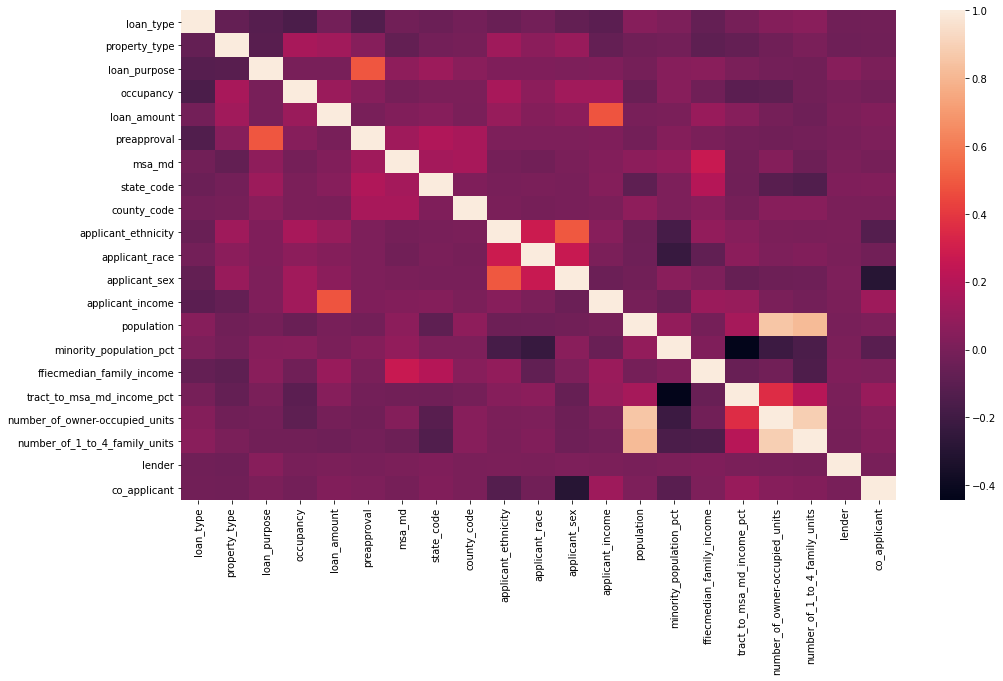

In [54]:
plt.rcParams["figure.figsize"] = [16,9]
se.heatmap(train.corr())

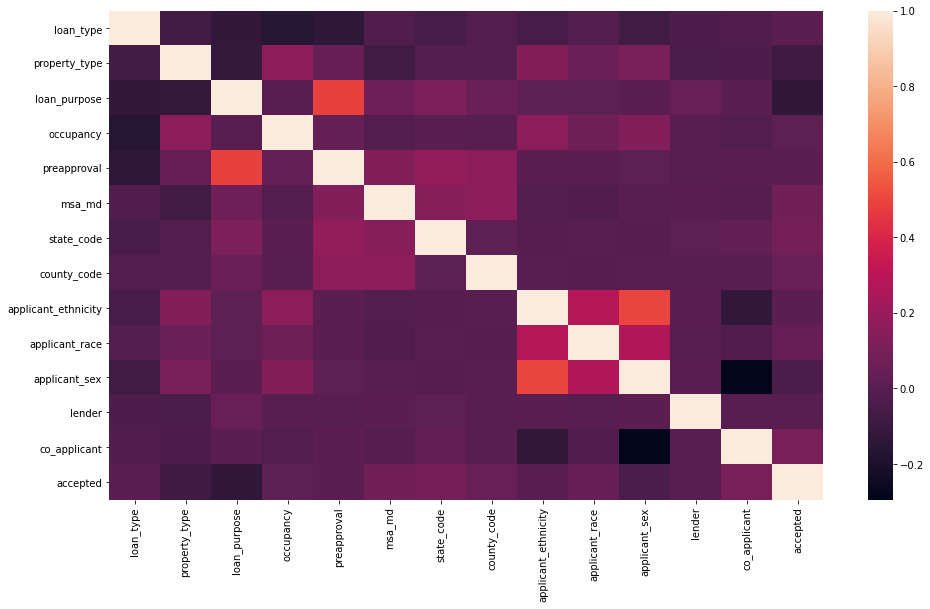

In [55]:
plt.rcParams["figure.figsize"] = [16,9]
se.heatmap(Cat_features.corr())

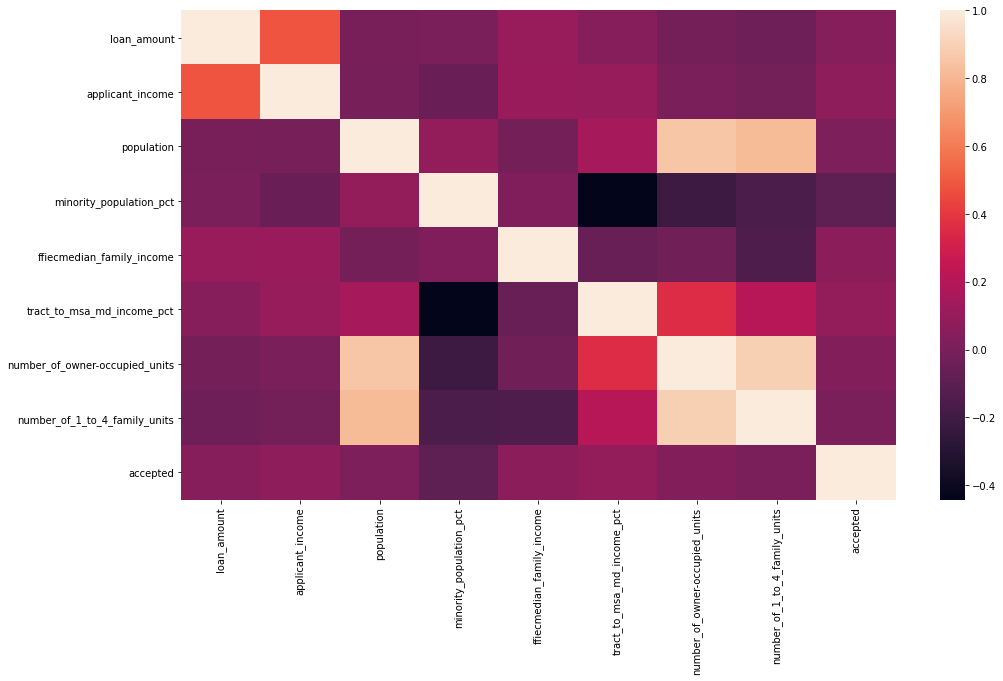

In [56]:
plt.rcParams["figure.figsize"] = [16,9]
se.heatmap(num_features.corr())

The correlation matrix gives the measure of relationship between features. The whole features space was considered and the heatmap shows this degree of relationship pictorially. The features pace was also subdivided into categorical and numerical features and the correlation step was done again.

#KMO and Feature selection

In [ ]:
new=All.groupby('applicant_ethnicity')['accepted'].mean().reset_index().rename(
    columns={'applicant_ethnicity':'applicant_ethnicity','accepted' : 'MeanAccepted'})
new

,applicant_ethnicity,MeanAccepted
0,1,0.445371
1,2,0.543279
2,3,0.427098
3,4,0.644231


In [ ]:
new_2=All.groupby('applicant_sex')['accepted'].mean().reset_index().rename(
    columns={'applicant_sex':'applicant_sex','accepted' : 'MeanAccepted'})
new_2

,applicant_sex,MeanAccepted
0,1,0.542572
1,2,0.492201
2,3,0.432736
3,4,0.820513


In [ ]:
new_3=All[All.state_code == 45]
new_4=new_3.groupby('applicant_income')['loan_amount'].mean().reset_index().rename(
    columns={'applicant_income':'applicant_income','loan_amount' : 'Meanloan'})
new_4.head()


,applicant_income,Meanloan
0,1.0,151.000000
1,3.0,68.000000
2,6.0,171.333333
3,7.0,191.000000
4,8.0,151.500000


In [ ]:
new_5=All[All.state_code == 48]
new_6=new_5.groupby('county_code')['accepted'].mean().reset_index().rename(
    columns={'county_code':'county_code','accepted' : 'MeanAccepted'})
new_6.head()

,county_code,MeanAccepted
0,2,0.468750
1,3,0.507246
2,10,0.647059
3,11,0.390244
4,14,0.477064


In [ ]:
new_7=new_6.drop(0)
new_7.describe()

,county_code,MeanAccepted
count,61.000000,61.000000
mean,149.918033,0.486083
std,98.163859,0.084993
min,3.000000,0.318182
25%,61.000000,0.442857
50%,131.000000,0.477273
75%,246.000000,0.540123
max,321.000000,0.666667


In [ ]:
new_10=All[All.state_code == 4]
new_11=new_10.groupby('loan_type')['accepted'].mean().reset_index().rename(
    columns={'loan_type':'loan_type','accepted' : 'MeanAccepted'})
new_11

,loan_type,MeanAccepted
0,1,0.575226
1,2,0.545455
2,3,0.596457
3,4,0.640625


In [ ]:
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split


In [ ]:
print(All.columns)
Unused=['tract_to_msa_md_income_pct','number_of_owner-occupied_units','msa_md','county_code','applicant_race','minority_population_pct','accepted']
feats=['loan_type','number_of_1_to_4_family_units',
       'property_type', 'loan_purpose', 'occupancy','lender','co_applicant',
       'loan_amount', 'preapproval', 'state_code','applicant_ethnicity','applicant_sex','applicant_income','population','ffiecmedian_family_income']
#list = ['url','shares']
X = All.drop(Unused, axis = 1)
#x = x[feats]
X.columns
y = All.loc[:,'accepted']

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'accepted'],
      dtype='object')


In [ ]:
#scatter_matrix(X, c='y', figsize=(15,15), s=150, marker='D')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#scaler.fit(X)
#X=scaler.transform(X)
df_scaled = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)


Based on the correlation plot, redundant features were removed to make the model parsimonious. The relationship between features and the response was similarly considered to determine important features. The features were also scaled using the scikit-learn standardscaler, this will prevent dominace of some features on others in terms of their magnitude.

#Model development and analysis

In [ ]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report 
from sklearn.metrics import mean_squared_error as mse



Log=LogisticRegression(penalty='l2',C=1.0, intercept_scaling=1, random_state=42, max_iter=100)
## Trains the learner, Log, with the training dataset
Log.fit(X_train, y_train)

# Prediction on the training dataset
y_tr_pred = Log.predict(X_train)

# Classification repport on the training dataset:
print('Classification repport:\n',classification_report(y_train, y_tr_pred))
# Accuracy score on the training dataset
print('Accuracy score:\n',Log.score(X_train, y_train))

Classification repport:
               precision    recall  f1-score   support

           0       0.61      0.61      0.61    168076
           1       0.64      0.65      0.65    182528

    accuracy                           0.63    350604
   macro avg       0.63      0.63      0.63    350604
weighted avg       0.63      0.63      0.63    350604

Accuracy score:
 0.6302466600495146
CPU times: user 1.58 s, sys: 587 ms, total: 2.17 s
Wall time: 1.41 s


In [ ]:
# Test the learner, Log, with the test dataset
%%time

## Prediction on the training dataset
y_te_pred = Log.predict(X_test)

# Classification repport on the training dataset:
print('Classification repport:\n',classification_report(y_test, y_te_pred))

# Accuracy score on the training dataset
print('Accuracy score:\n',Log.score(X_test, y_test))

Classification repport:
               precision    recall  f1-score   support

           0       0.61      0.61      0.61     42132
           1       0.64      0.64      0.64     45519

    accuracy                           0.63     87651
   macro avg       0.63      0.63      0.63     87651
weighted avg       0.63      0.63      0.63     87651

Accuracy score:
 0.6285724064756819
CPU times: user 224 ms, sys: 94.3 ms, total: 318 ms
Wall time: 205 ms


The train data and label were divided in to training and test dataset. This is conventional as it gives and idea of the model performance on unknown data samples. Given that the problem is a binary classifiaction problem with response as accepted(1) and rejected(0), a logistic regression model was fit to the training set and an accuracy score of 0.63 (63 %)was acheived. Consequently, this performance was validated on the test set and the model achieved an accuracy of 0.63 (63 %). There are other metrics (recall, precision, f-score) that were considered to evaluate the model perfomance. 